### DIABETES PREDICTION 
**This is a project of predicting Diabetes using *Support Vector Machine (SVM)* which is a *Supervised Machine Learning Algorithm* used for classification and regression tasks.**

#### 1] Importing The Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 2] Data Collection & Analysis
**Data Collection is the process of gathering and measuring information from different sources**

In [3]:
# Loding the Diabetes dataset to Pandas Dataframe
data=pd.read_csv("diabetes.csv")

In [4]:
# First five rows
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Last five rows
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
# Number of rows and columns in this dataset (rows,columns)
data.shape

(768, 9)

In [7]:
# All statistical measure of the dataset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# Counting the different outcomes
data["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

**In this Outcomes :**
- **0 -> Non Diabetic**
- **1 -> Diabetic**

C:\Users\kaifm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kaifm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kaifm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


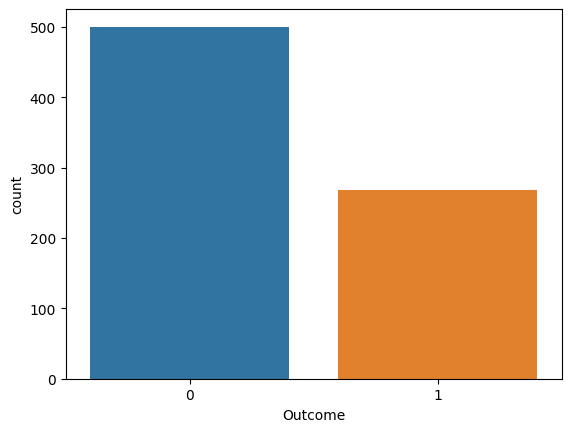

In [19]:
sns.countplot(x=data["Outcome"]);

In [21]:
# Mean value of each numerical column with each of the outcome (0,1)
data.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


#### 3] Separating the Input & Output labels

In [22]:
# Input Label x
x=data.drop(columns="Outcome",axis=1)

In [23]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [25]:
# Output label y
y=data["Outcome"]

In [28]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

#### 4] Data Standardization
**Data Standardization is a data processing workflow that converts the structure of different dataset into one common format of data , It deals with Trasformation of datasets after data collected from different sources before it is loaded into target systems**

**StandardScaler : It is used to standardize features by removing mean and scaling to unit variance**

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler=StandardScaler()

In [31]:
# It subtracts the mean and divides by Standard Deviation for each feature

In [33]:
scaler.fit(x)

StandardScaler()

In [34]:
standard_data=scaler.transform(x)

In [36]:
standard_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [37]:
# The standardized data is then assigned back to variable x
x=standard_data

In [40]:
print(x,"\n\n",y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]] 

 0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


#### 5] Train-Test Split
**A Train-Test Split is when you split your data into training set and testing test.**

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=1)

- **x:Feature Matrix**
- **y:Target Variable**
- **test_size=0.2: 20% data will be used for testing**
- **random_state=1 : Everytime we run code with random_state=1 it will produce same splitting datasets**

In [56]:
print(f"x_train : {x_train.shape}\nx_test : {x_test.shape}\ny_train : {y_train.shape}\ny_test : {y_test.shape}")

x_train : (614, 8)
x_test : (154, 8)
y_train : (614,)
y_test : (154,)


#### 6] Training the dataset with SVM

In [57]:
from sklearn import svm

In [64]:
# Creating the Support Vector Machine Model
classifier=svm.SVC(kernel='linear')

In [65]:
# Training the Support Vector Machine Classifier Model
classifier.fit(x_train,y_train)

SVC(kernel='linear')

#### 7] Evaluation of the Model
**Model Evaluation is the process of determining a model's performance via metrics driven analysis.**

**Accuracy : It is defined as the percentage of correct predictions for the test data.**


In [69]:
from sklearn.metrics import accuracy_score

In [70]:
# Accuracy Score on the Training data

In [71]:
x_pred=classifier.predict(x_train)

In [79]:
print(f"Accuracy score on the training data : {accuracy_score(x_pred,y_train)}")

Accuracy score on the training data : 0.7833876221498371


In [78]:
# Accuracy Score on the Testing data

In [80]:
y_pred=classifier.predict(x_test)

In [81]:
print(f"Accuracy score on the training data : {accuracy_score(y_pred,y_test)}")

Accuracy score on the training data : 0.7792207792207793


**Confusion Matrix : It is a performance evaluation tool in Machine Learning representing the accuracy of a classification model** 

**Classification Report : It is one of the performance evaluation metrics of Machine Learning model. It displays your model's Precision,Recall,F1 Score,Support.It provides better understanding of the overall performance of the model.**

In [87]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

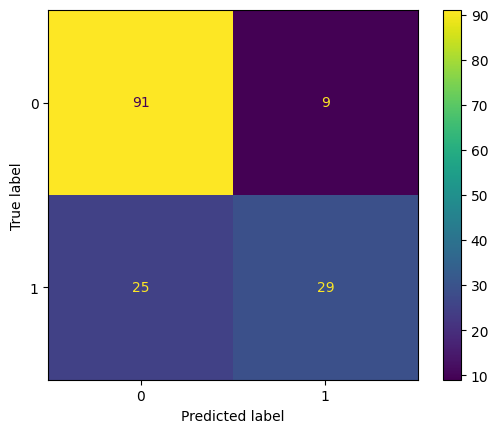

In [88]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred);

In [84]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.54      0.63        54

    accuracy                           0.78       154
   macro avg       0.77      0.72      0.74       154
weighted avg       0.78      0.78      0.77       154



#### 8] Making a Predictive System
**Here I made a function that will take input from the patient and tells if the patient is diabetic or not.**

In [108]:
def predictions():
    #Taking Inputs from the User/Patient
    a=int(input("Pregnancies : "))
    b=int(input("Glucose : "))
    c=int(input("Blood Pressure : "))
    d=int(input("SkinThickness : "))
    e=int(input("Insulin : "))
    f=float(input("BMI : "))
    g=float(input("Diabetes Pedigree Function : "))
    h=int(input("Age : "))

    #Converting it into NumPy array
    z=np.array((a,b,c,d,e,f,g,h))

    #Reshape the array as we are predicting for one instance
    reshaped_data=z.reshape(1,-1)
    
    #Standardize the Input data
    std=scaler.transform(reshaped_data)

    pred=classifier.predict(std)
    if(pred[0]==0):
        print("\nThe person is not Diabetic")
    else:
        print("\nThe person is Diabetic")
        

## THANK YOU :)